#### Define a Feed Forward Neural Network (FFNN)

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from lib.models.feedforwardNN import FFNN

shape=[1, 10, 1]
act_function_hidden = nn.Sigmoid()
act_function_out = nn.Linear
#activation_function = nn.Sigmoid()

model = FFNN(shape, act_function_hidden, act_function_out)


print(model)


FFNN(
  (afun_hidden): Sigmoid()
  (layers): ModuleList(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)


#### Load Dataset

In [2]:
import torch
import numpy as np 
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

if 0:
    points = np.genfromtxt('data/external/toydata/data.csv', delimiter=',')
    N = len(points)
else:
    N = 500
    points = np.zeros((N, 2))
    xx = np.linspace(0, 4*np.pi, N)
    points[:,0] = xx 
    points[:,1] = 1*np.sin(xx) + np.random.normal(0, 0.1, N)

if 0:
    plt.scatter(points[:,0], points[:,1])
    plt.show()



range_x = np.array([np.min(points[:,0]), np.max(points[:,0])])
#Extract columns and reshape to column vecotr
X = torch.tensor(points[:,0].reshape(N,1), dtype=torch.float)
Y = torch.tensor(points[:,1].reshape(N,1), dtype=torch.float)
#X = torch.cat((X, X), 1)
#Y = torch.cat((Y, Y), 1)

# Check Proper Dimensions
#print(model( torch.tensor(np.array([[2],[2]]), dtype=torch.float)) )
#print(model( X))

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=41)

train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)


batch_size = 10
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=len(test_data.tensors[0]))


#### Train FFNN with $L_1$ Regularization on Weights only

In [3]:


num_epochs = 1
train_RMS = np.zeros(num_epochs)

model = FFNN(shape, act_function_hidden, act_function_out, bias=True) # Initilize Model
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

# Reference implementing L_1 Reg
# https://saturncloud.io/blog/adding-l1l2-regularization-in-pytorch/
reg_lambda = 1e-2

loss_function = nn.MSELoss() 

if 0:
    train_loss, test_loss = model.trainEpochs(train_loader, num_epochs, optimizer, loss_function, test_loader)
else:
    #train_loss, test_loss = model.trainEpochsRegularized(train_loader, num_epochs, optimizer, loss_function, test_loader, 1, reg_lambda)
    model.trainEKF(X_train, y_train, num_epochs, p=1e3, q=1e-4, r=1e-1)

xin = np.linspace( range_x[0], range_x[1], num=N)
xin = torch.tensor(xin.reshape(N, 1), dtype=torch.float)
#ypred_test = model(xin.to(model.device))
ypred_test = torch.tensor(model(xin), dtype=torch.float)

    


C:\Users\z004um2a\AppData\Local\Temp\ipykernel_3368\2498978697.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ypred_test = torch.tensor(model(xin), dtype=torch.float)


#### Plot Results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


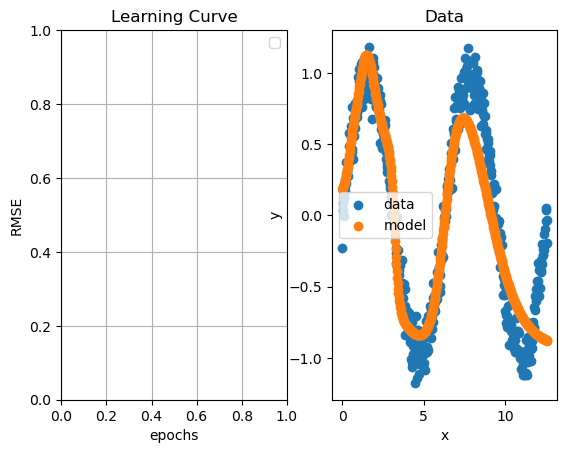

In [4]:
import matplotlib.pyplot as plt
import torch

epochs = range(num_epochs)

fig, (ax1, ax2) = plt.subplots(1, 2)

# Learnign Curve
#ax1.plot(epochs, np.sqrt(train_loss), label='train')
#ax1.plot(epochs, np.sqrt(test_loss), label='test')
ax1.set_xlabel('epochs')
ax1.set_ylabel('RMSE')
ax1.set_title('Learning Curve')
ax1.legend()
ax1.grid()
#plt.show()



# Prediction
ax2.scatter(X, Y, label="data")
ax2.scatter(xin, ypred_test, label="model")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Data')
ax2.legend()
#plt.show()

